Mejores parámetros para RandomForest: {'max_depth': 20, 'n_estimators': 200}
Informe de clasificación para RandomForest:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      7303
           1       0.67      0.45      0.54       935

    accuracy                           0.91      8238
   macro avg       0.80      0.71      0.74      8238
weighted avg       0.90      0.91      0.90      8238

Matriz de confusión para RandomForest:
[[7094  209]
 [ 516  419]]


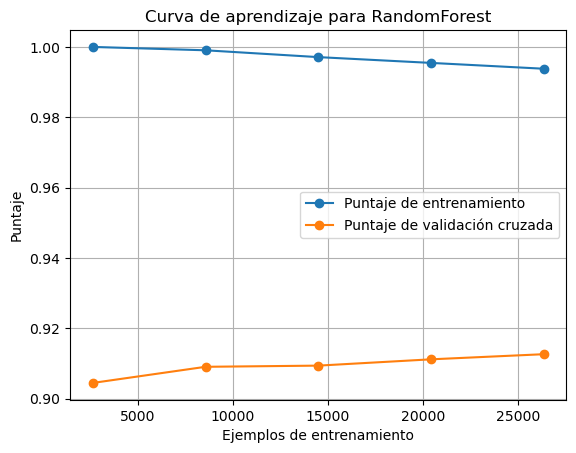

['rf_model.joblib']

In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
from joblib import dump

# Cargar los datos preprocesados
X = pd.read_csv('X_preprocessed.csv')
y = pd.read_csv('y_encoded.csv')

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelo RandomForest
rf = RandomForestClassifier()
rf_params = {'n_estimators': [100, 200], 'max_depth': [10, 20]}
rf_grid = GridSearchCV(rf, rf_params, cv=5)
rf_grid.fit(X_train, y_train.values.ravel())
print(f"Mejores parámetros para RandomForest: {rf_grid.best_params_}")

# Evaluación del modelo
y_pred_rf = rf_grid.predict(X_test)
print("Informe de clasificación para RandomForest:")
print(classification_report(y_test, y_pred_rf))
print("Matriz de confusión para RandomForest:")
print(confusion_matrix(y_test, y_pred_rf))

# Curva de aprendizaje
def plot_learning_curve(estimator, X, y, title):
    from sklearn.model_selection import learning_curve
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=5)
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)

    plt.plot(train_sizes, train_scores_mean, 'o-', label='Puntaje de entrenamiento')
    plt.plot(train_sizes, test_scores_mean, 'o-', label='Puntaje de validación cruzada')
    plt.title(title)
    plt.xlabel('Ejemplos de entrenamiento')
    plt.ylabel('Puntaje')
    plt.legend(loc='best')
    plt.grid()
    plt.show()

plot_learning_curve(rf_grid.best_estimator_, X_train, y_train.values.ravel(), 'Curva de aprendizaje para RandomForest')

# Guardar el modelo RandomForest
dump(rf_grid, 'rf_model.joblib')
